# Mushroom classification

Sử dụng cả Logistic Regression và Decision Tree để thực hiện việc xác định một mẫu nấm là nấm ăn được hay nấm độc dựa vào các thông tin còn lại. Trong hai thuật toán trên thì thuật toán nào phù hợp hơn cho bộ dữ liệu này? Vì sao ?

In [ ]:
data <- read.csv("./Du lieu cung cap/mushroom.csv",header=TRUE,stringsAsFactors = TRUE)
head(data)

,X,Class,cap.shape,cap.surface,cap.color,bruises,odor,gill.attachment,gill.spacing,gill.size,...,stalk.surface.below.ring,stalk.color.above.ring,stalk.color.below.ring,veil.type,veil.color,ring.number,ring.type,print,population,habitat
,<int>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,...,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>
1,1,Poisonous,x,s,n,t,None,f,c,n,...,s,w,w,p,w,o,p,Buff,s,u
2,2,Edible,x,s,y,t,Almonds,f,c,b,...,s,w,w,p,w,o,p,Chocolate,n,g
3,3,Edible,b,s,w,t,Fishy,f,c,b,...,s,w,w,p,w,o,p,Chocolate,n,m
4,4,Poisonous,x,y,w,t,None,f,c,n,...,s,w,w,p,w,o,p,Buff,s,u
5,5,Edible,x,s,g,f,Musty,f,w,b,...,s,w,w,p,w,o,e,Chocolate,a,g
6,6,Edible,x,y,y,t,Almonds,f,c,b,...,s,w,w,p,w,o,p,Buff,n,g


In [ ]:
print(is.data.frame(data))

[1] TRUE


In [ ]:
print(paste("cols: ", ncol(data)))
print(paste("rows: ", nrow(data)))

[1] "cols:  24"
[1] "rows:  8124"


In [ ]:
summary(data)

       X              Class      cap.shape cap.surface   cap.color    bruises 
 Min.   :   1   Edible   :4208   b: 452    f:2320      n      :2284   f:4748  
 1st Qu.:2032   Poisonous:3916   c:   4    g:   4      g      :1840   t:3376  
 Median :4062                    f:3152    s:2556      e      :1500           
 Mean   :4062                    k: 828    y:3244      y      :1072           
 3rd Qu.:6093                    s:  32                w      :1040           
 Max.   :8124                    x:3656                b      : 168           
                                                       (Other): 220           
       odor      gill.attachment gill.spacing gill.size   gill.color  
 Musty   :3528   a: 210          c:6812       b:5612    b      :1728  
 Creosote:2160   f:7914          w:1312       n:2512    p      :1492  
 Pungent : 576                                          w      :1202  
 Spicy   : 576                                          n      :1048  
 Almonds : 40

In [ ]:
str(data)

'data.frame':	8124 obs. of  24 variables:
 $ X                       : int  1 2 3 4 5 6 7 8 9 10 ...
 $ Class                   : Factor w/ 2 levels "Edible","Poisonous": 2 1 1 2 1 1 1 1 2 1 ...
 $ cap.shape               : Factor w/ 6 levels "b","c","f","k",..: 6 6 1 6 6 6 1 1 6 1 ...
 $ cap.surface             : Factor w/ 4 levels "f","g","s","y": 3 3 3 4 3 4 3 4 4 3 ...
 $ cap.color               : Factor w/ 10 levels "b","c","e","g",..: 5 10 9 9 4 10 9 9 9 10 ...
 $ bruises                 : Factor w/ 2 levels "f","t": 2 2 2 2 1 2 2 2 2 2 ...
 $ odor                    : Factor w/ 9 levels "Almonds","Anise",..: 7 1 4 7 6 1 1 4 7 1 ...
 $ gill.attachment         : Factor w/ 2 levels "a","f": 2 2 2 2 2 2 2 2 2 2 ...
 $ gill.spacing            : Factor w/ 2 levels "c","w": 1 1 1 1 2 1 1 1 1 1 ...
 $ gill.size               : Factor w/ 2 levels "b","n": 2 1 1 2 1 1 1 1 2 1 ...
 $ gill.color              : Factor w/ 12 levels "b","e","g","h",..: 5 5 6 6 5 6 3 6 8 3 ...
 $ stalk.shape   

Dựa trên thống kê phía trên, bỏ cột veil.type do cột veil.type chỉ có 1 dữ liệu factor.

Bỏ cột X do cột X là cột index

Cột Class là cột target

In [ ]:
library(corrplot)

Warning message:
"package 'corrplot' was built under R version 3.6.3"
corrplot 0.88 loaded



In [ ]:
library(Amelia)

Warning message:
"package 'Amelia' was built under R version 3.6.3"
Loading required package: Rcpp

## 
## Amelia II: Multiple Imputation
## (Version 1.7.6, built: 2019-11-24)
## Copyright (C) 2005-2021 James Honaker, Gary King and Matthew Blackwell
## Refer to http://gking.harvard.edu/amelia/ for more information
## 



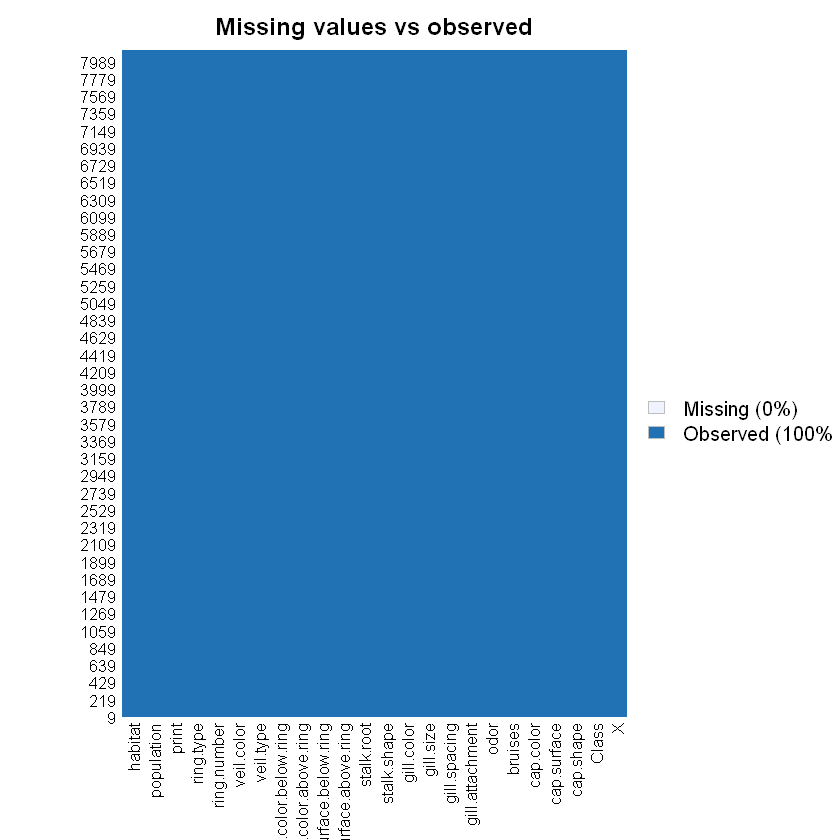

In [ ]:
missmap(data, main="Missing values vs observed")

There is no missing values in the dataset

In [ ]:
print(table(data$Class))


   Edible Poisonous 
     4208      3916 


Dữ liệu của 2 class cân bằng.

In [ ]:
print(table(data$Class,data$cap.color))

           
               b    c    e    g    n    p    r    u    w    y
  Edible      48   32  624 1032 1264   56   16   16  720  400
  Poisonous  120   12  876  808 1020   88    0    0  320  672


Nấm độc không có cap.color = r hoặc u

In [ ]:
print(table(data$Class,data$cap.shape))

           
               b    c    f    k    s    x
  Edible     404    0 1596  228   32 1948
  Poisonous   48    4 1556  600    0 1708


Nấm độc không có cap.shape = s. Nấm ăn được không có cap.shape=c. Tuy nhiên cap.shape = c hoặc s đều cho số lượng ít ở cả 2 loại nấm

In [ ]:
print(table(data$Class, data$odor))

           
            Almonds Anise Creosote Fishy Foul Musty None Pungent Spicy
  Edible        400     0        0   400    0  3408    0       0     0
  Poisonous       0   192     2160     0   36   120  256     576   576


Thuộc tính Odor dường như có liên quan mật thiết đến loại nấm độc hay không độc.

Trừ mùi Musty có ở cả 2 loại nấm (chủ yếu nấm ăn được có mùi này), các mùi còn lại chỉ có ở 1 trong 2 loại nấm.

In [ ]:
print(table(data$Class, data$gill.color))

           
               b    e    g    h    k    n    o    p    r    u    w    y
  Edible       0   96  248  204  344  936   64  852    0  444  956   64
  Poisonous 1728    0  504  528   64  112    0  640   24   48  246   22


Nấm ăn được không có gill.color=b hoặc r, trong khi nấm độc không có gill.color = e hoặc o.

In [ ]:
print(table(data$Class, data$gill.size))

           
               b    n
  Edible    3920  288
  Poisonous 1692 2224


Bảng trên cho thấy nấm ăn được thường có gill.size = b, trong khi đó ở nấm độc thường gill.size = n, mặc dù số nấm độc có gill.size = b khá lớn so với tổng số nấm độc. 

In [ ]:
print(table(data$Class, data$habitat))

           
               d    g    l    m    p    u    w
  Edible    1880 1408  240  256  136   96  192
  Poisonous 1268  740  592   36 1008  272    0


Nấm độc không có habitat = 0

In [ ]:
library("tidyverse")

Warning message:
"package 'tidyverse' was built under R version 3.6.3"
-- Attaching packages ------------------------------------------------------------------------------- tidyverse 1.3.1 --

v ggplot2 3.3.3     v purrr   0.3.3
v tibble  3.1.1     v dplyr   1.0.5
v tidyr   1.1.3     v stringr 1.4.0
v readr   1.4.0     v forcats 0.5.1

Warning message:
"package 'ggplot2' was built under R version 3.6.3"
Warning message:
"package 'tibble' was built under R version 3.6.3"
Warning message:
"package 'tidyr' was built under R version 3.6.3"
Warning message:
"package 'readr' was built under R version 3.6.3"
Warning message:
"package 'dplyr' was built under R version 3.6.3"
Warning message:
"package 'stringr' was built under R version 3.6.3"
Warning message:
"package 'forcats' was built under R version 3.6.3"
-- Conflicts ---------------------------------------------------------------------------------- tidyverse_conflicts() --
x dplyr::filter() masks stats::filter()
x dplyr::lag()    masks s

In [ ]:
data_sub = select(data, -c("X","veil.type"))
head(data_sub)

,Class,cap.shape,cap.surface,cap.color,bruises,odor,gill.attachment,gill.spacing,gill.size,gill.color,...,stalk.surface.above.ring,stalk.surface.below.ring,stalk.color.above.ring,stalk.color.below.ring,veil.color,ring.number,ring.type,print,population,habitat
,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,...,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>
1,Poisonous,x,s,n,t,None,f,c,n,k,...,s,s,w,w,w,o,p,Buff,s,u
2,Edible,x,s,y,t,Almonds,f,c,b,k,...,s,s,w,w,w,o,p,Chocolate,n,g
3,Edible,b,s,w,t,Fishy,f,c,b,n,...,s,s,w,w,w,o,p,Chocolate,n,m
4,Poisonous,x,y,w,t,None,f,c,n,n,...,s,s,w,w,w,o,p,Buff,s,u
5,Edible,x,s,g,f,Musty,f,w,b,k,...,s,s,w,w,w,o,e,Chocolate,a,g
6,Edible,x,y,y,t,Almonds,f,c,b,n,...,s,s,w,w,w,o,p,Buff,n,g


In [ ]:
data_sub$class <- ifelse(data_sub$Class == "Poisonous",1,0)
head(data_sub)

,Class,cap.shape,cap.surface,cap.color,bruises,odor,gill.attachment,gill.spacing,gill.size,gill.color,...,stalk.surface.below.ring,stalk.color.above.ring,stalk.color.below.ring,veil.color,ring.number,ring.type,print,population,habitat,class
,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,...,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<dbl>
1,Poisonous,x,s,n,t,None,f,c,n,k,...,s,w,w,w,o,p,Buff,s,u,1
2,Edible,x,s,y,t,Almonds,f,c,b,k,...,s,w,w,w,o,p,Chocolate,n,g,0
3,Edible,b,s,w,t,Fishy,f,c,b,n,...,s,w,w,w,o,p,Chocolate,n,m,0
4,Poisonous,x,y,w,t,None,f,c,n,n,...,s,w,w,w,o,p,Buff,s,u,1
5,Edible,x,s,g,f,Musty,f,w,b,k,...,s,w,w,w,o,e,Chocolate,a,g,0
6,Edible,x,y,y,t,Almonds,f,c,b,n,...,s,w,w,w,o,p,Buff,n,g,0


In [ ]:
data_sub$class <- as.factor(data_sub$class)

In [ ]:
head(data_sub)

,Class,cap.shape,cap.surface,cap.color,bruises,odor,gill.attachment,gill.spacing,gill.size,gill.color,...,stalk.surface.below.ring,stalk.color.above.ring,stalk.color.below.ring,veil.color,ring.number,ring.type,print,population,habitat,class
,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,...,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>
1,Poisonous,x,s,n,t,None,f,c,n,k,...,s,w,w,w,o,p,Buff,s,u,1
2,Edible,x,s,y,t,Almonds,f,c,b,k,...,s,w,w,w,o,p,Chocolate,n,g,0
3,Edible,b,s,w,t,Fishy,f,c,b,n,...,s,w,w,w,o,p,Chocolate,n,m,0
4,Poisonous,x,y,w,t,None,f,c,n,n,...,s,w,w,w,o,p,Buff,s,u,1
5,Edible,x,s,g,f,Musty,f,w,b,k,...,s,w,w,w,o,e,Chocolate,a,g,0
6,Edible,x,y,y,t,Almonds,f,c,b,n,...,s,w,w,w,o,p,Buff,n,g,0


In [ ]:
print(table(data_sub$class))


   0    1 
4208 3916 


Train/test split

In [ ]:
n = nrow(data_sub)
trainIndex = sample(1:n, size=round(0.7*n), replace=FALSE)
train= data_sub[trainIndex,]
test= data_sub[-trainIndex,]
print("Rows of training data and test data:")
print(nrow(train))
print(nrow(test))

[1] "Rows of training data and test data:"
[1] 5687
[1] 2437


## Logistic Regression

Do thuộc tính odor ở trên cho thấy mối liên quan lớn đến loại nấm độc hay nấm không độc, chọn 1 thuộc tính odor để phân loại nấm

In [ ]:
start_time = Sys.time()

In [ ]:
mylogit <- glm(class ~ odor, data=train, family="binomial")
print(summary(mylogit))


Call:
glm(formula = class ~ odor, family = "binomial", data = train)

Deviance Residuals: 
     Min        1Q    Median        3Q       Max  
-0.25975  -0.25975  -0.00003   0.00003   2.61001  

Coefficients:
               Estimate Std. Error z value Pr(>|z|)
(Intercept)  -2.157e+01  1.750e+03  -0.012    0.990
odorAnise     4.313e+01  3.104e+03   0.014    0.989
odorCreosote  4.313e+01  1.906e+03   0.023    0.982
odorFishy    -8.083e-11  2.460e+03   0.000    1.000
odorFoul      4.313e+01  6.218e+03   0.007    0.994
odorMusty     1.819e+01  1.750e+03   0.010    0.992
odorNone      4.313e+01  2.763e+03   0.016    0.988
odorPungent   4.313e+01  2.252e+03   0.019    0.985
odorSpicy     4.313e+01  2.295e+03   0.019    0.985

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 7875.11  on 5686  degrees of freedom
Residual deviance:  719.84  on 5678  degrees of freedom
AIC: 737.84

Number of Fisher Scoring iterations: 20



In [ ]:
end_time = Sys.time()
print(paste("Execution time: ", end_time - start_time))

[1] "Execution time:  0.759438991546631"


In [ ]:
pred = predict(mylogit,
              newdata = test,
              type="response")

pred_value <- ifelse(pred > 0.5, 1,0)
print("Testdata Class vs predict (10 rows:)")
result <- data.frame(testClass = test$class, pred_value)
head(result)

[1] "Testdata Class vs predict (10 rows:)"


,testClass,pred_value
,<fct>,<dbl>
5,0,0
12,0,0
16,0,0
17,0,0
20,1,1
24,0,0


In [ ]:
misClasificError <- mean(pred_value != test$class)
print(paste("Accuracy s2:", 1-misClasificError))

[1] "Accuracy s2: 0.984407057858022"


In [ ]:
accuracy <- table(pred_value, test[,"class"])
accuracy = sum(diag(accuracy))/sum(accuracy)

In [ ]:
print(paste("Accuracy s1:", accuracy))

[1] "Accuracy s1: 0.984407057858022"


In [ ]:
library("caret")

Warning message:
"package 'caret' was built under R version 3.6.3"
Loading required package: lattice


Attaching package: 'caret'


The following object is masked from 'package:purrr':

    lift




In [ ]:
confusionMatrix(as.factor(pred_value), test$class)

Confusion Matrix and Statistics

          Reference
Prediction    0    1
         0 1253   38
         1    0 1146
                                          
               Accuracy : 0.9844          
                 95% CI : (0.9787, 0.9889)
    No Information Rate : 0.5142          
    P-Value [Acc > NIR] : < 2.2e-16       
                                          
                  Kappa : 0.9688          
                                          
 Mcnemar's Test P-Value : 1.947e-09       
                                          
            Sensitivity : 1.0000          
            Specificity : 0.9679          
         Pos Pred Value : 0.9706          
         Neg Pred Value : 1.0000          
             Prevalence : 0.5142          
         Detection Rate : 0.5142          
   Detection Prevalence : 0.5297          
      Balanced Accuracy : 0.9840          
                                          
       'Positive' Class : 0               
                        

Mô hình Logistic Regression sử dụng input là thuộc tính odor cho kết quả độ chính xác tới 98% 

Confusion matrix cho thấy tất cả các loại nấm độc đều được dự đoán chính xác, trong khi có 38 loại nấm thường bị phân vào nấm độc. --> kết quả này vẫn tốt vì trên thực tế, lầm tưởng nấm ăn được thành nấm độc thì tốt hơn là ngược lại.

-> mô hình rất tốt cho bài toán này. Tuy nhiên, chỉ số deviance vẫn cao --> giảm chỉ số này để model fit tốt hơn.

**Lấy thêm thuộc tính cho model**

class ~ odor, gill.color, gill.size, habitat

In [ ]:
start_time = Sys.time()

In [ ]:
mylogit1 <- glm(class ~ odor + gill.color + gill.size + habitat , data=train, family="binomial")
print(summary(mylogit1))

Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"



Call:
glm(formula = class ~ odor + gill.color + gill.size + habitat, 
    family = "binomial", data = train)

Deviance Residuals: 
   Min      1Q  Median      3Q     Max  
-1.545   0.000   0.000   0.000   2.229  

Coefficients:
               Estimate Std. Error z value Pr(>|z|)    
(Intercept)   -152.6692 13186.5837  -0.012    0.991    
odorAnise       87.2618 13654.2582   0.006    0.995    
odorCreosote   141.7877  9799.9232   0.014    0.988    
odorFishy       -0.1064  8069.8366   0.000    1.000    
odorFoul       103.0484 25686.7863   0.004    0.997    
odorMusty       42.9045  7745.7669   0.006    0.996    
odorNone       106.4514 11926.2661   0.009    0.993    
odorPungent    141.8178 12949.6156   0.011    0.991    
odorSpicy      141.7873 13073.4875   0.011    0.991    
gill.colore     73.3827 23976.0447   0.003    0.998    
gill.colorg     73.0503  9312.9627   0.008    0.994    
gill.colorh     51.7130  8912.9904   0.006    0.995    
gill.colork     51.9568 11078.4706   0.005 

In [ ]:
end_time = Sys.time()
print(paste("Execution time: ", end_time - start_time))

[1] "Execution time:  0.955559968948364"


In [ ]:
pred1 = predict(mylogit1,
              newdata = test,
              type="response")

pred_value1 <- ifelse(pred1 > 0.5, 1,0)
print("Testdata Class vs predict (10 rows:)")
result1 <- data.frame(testClass = test$class, pred_value1)
head(result1)

[1] "Testdata Class vs predict (10 rows:)"


,testClass,pred_value1
,<fct>,<dbl>
5,0,0
12,0,0
16,0,0
17,0,0
20,1,1
24,0,0


In [ ]:
misClasificError1 <- mean(pred_value1 != test$class)
print(paste("Accuracy s2:", 1-misClasificError1))

[1] "Accuracy s2: 0.994665572425113"


In [ ]:
accuracy1 <- table(pred_value1, test[,"class"])
accuracy1 = sum(diag(accuracy1))/sum(accuracy1)

In [ ]:
print(paste("Accuracy s1:", accuracy1))

[1] "Accuracy s1: 0.994665572425113"


In [ ]:
library("caret")

In [ ]:
confusionMatrix(as.factor(pred_value1), test$class)

Confusion Matrix and Statistics

          Reference
Prediction    0    1
         0 1251   11
         1    2 1173
                                          
               Accuracy : 0.9947          
                 95% CI : (0.9909, 0.9972)
    No Information Rate : 0.5142          
    P-Value [Acc > NIR] : <2e-16          
                                          
                  Kappa : 0.9893          
                                          
 Mcnemar's Test P-Value : 0.0265          
                                          
            Sensitivity : 0.9984          
            Specificity : 0.9907          
         Pos Pred Value : 0.9913          
         Neg Pred Value : 0.9983          
             Prevalence : 0.5142          
         Detection Rate : 0.5133          
   Detection Prevalence : 0.5178          
      Balanced Accuracy : 0.9946          
                                          
       'Positive' Class : 0               
                        

Sau khi lấy thêm thuộc tính, độ chính xác tăng lên 99%.

Confusion matrix cho thấy số lượng nấm không độc được dự đoán tốt hơn model trước, tuy nhiên có 2 cây nấm độc bị dự đoán thành nấm ăn được.

--> mặc dù model này cho độ chính xác cao hơn và chỉ số deviance thấp hơn, nó lại dự đoán nấm độc thành nấm ăn được. Kết quả này không được khuyến khích vì trên thực tế, nhận biết nấm độc quan trọng hơn.

## Decision Tree

In [ ]:
library(rpart)

In [ ]:
start_time = Sys.time()

In [ ]:
mushroom.tree <- rpart(Class ~ odor #+ gill.color + gill.size + habitat
                  ,data = train, method="class")

In [ ]:
print(mushroom.tree)

n= 5687 

node), split, n, loss, yval, (yprob)
      * denotes terminal node

1) root 5687 2732 Edible (0.51960612 0.48039388)  
  2) odor=Almonds,Fishy,Musty 3037   82 Edible (0.97299967 0.02700033) *
  3) odor=Anise,Creosote,Foul,None,Pungent,Spicy 2650    0 Poisonous (0.00000000 1.00000000) *


In [ ]:
end_time = Sys.time()
print(paste("Execution time: ", end_time - start_time))

[1] "Execution time:  0.307793855667114"


In [ ]:
# test model
pred_new = predict(mushroom.tree, test, type='class')

# accuracy
accuracy2 <- table(pred_new, test$Class)
accuracy2 = sum(diag(accuracy2))/sum(accuracy2)
print(paste("Accuracy s1:", accuracy2))

[1] "Accuracy s1: 0.984407057858022"


In [ ]:
start_time = Sys.time()

In [ ]:
mushroom.tree1 <- rpart(Class ~ odor + gill.color + gill.size + habitat
                  ,data = train, method="class")

In [ ]:
print(mushroom.tree1)

n= 5687 

node), split, n, loss, yval, (yprob)
      * denotes terminal node

1) root 5687 2732 Edible (0.51960612 0.48039388)  
  2) odor=Almonds,Fishy,Musty 3037   82 Edible (0.97299967 0.02700033) *
  3) odor=Anise,Creosote,Foul,None,Pungent,Spicy 2650    0 Poisonous (0.00000000 1.00000000) *


In [ ]:
end_time = Sys.time()
print(paste("Execution time: ", end_time - start_time))

[1] "Execution time:  0.268839836120605"


In [ ]:
# draw tree
library('rpart.plot')

Warning message:
"package 'rpart.plot' was built under R version 3.6.3"


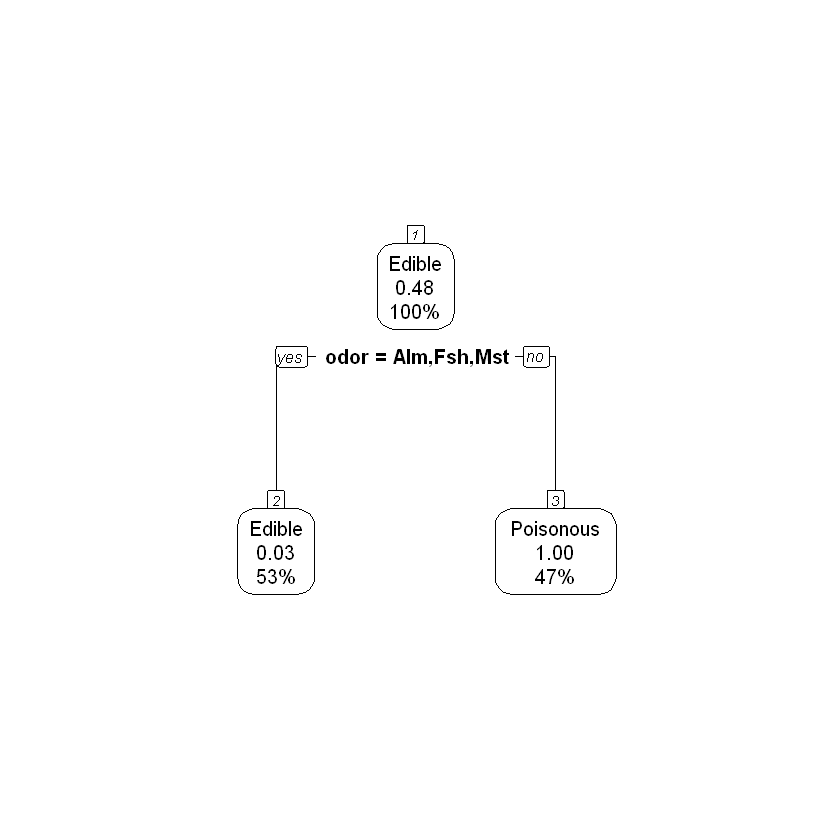

In [ ]:
prp(mushroom.tree, type=2, extra='auto',nn=TRUE,branch=1,varlen=0,yesno=2)

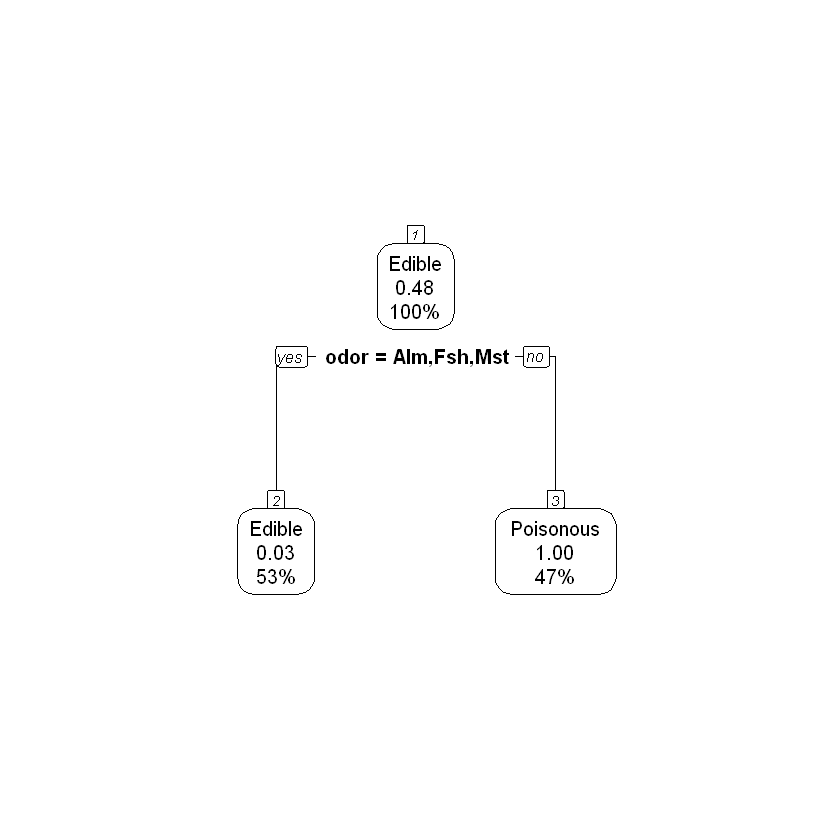

In [ ]:
prp(mushroom.tree1, type=2, extra='auto',nn=TRUE,branch=1,varlen=0,yesno=2)

In [ ]:
# test model
pred_new1 = predict(mushroom.tree1, test, type='class')

# accuracy
accuracy3 <- table(pred_new, test$Class)
accuracy3 = sum(diag(accuracy3))/sum(accuracy3)
print(paste("Accuracy s1:", accuracy3))

[1] "Accuracy s1: 0.984407057858022"


**Nhận xét:**
Cả 2 thuật toán Logistic Regression và Decision Tree đều phù hợp với bộ dữ liệu này do có accuracy rất cao (>98%).
Ở model Decision Tree, cho thấy 1 lần nữa thuộc tính odor mang tính quyết định để phân loại nấm, độ chính xác ngang bằng với model Logistic Regression với 1 thuộc tính odor (98%).

Thuận toán Decision Tree tối ưu hơn, do dữ liệu có các thuộc tính đều ở dạng factor, thuật toán Decision Tree xử lí và cho kết quả nhanh hơn so với Logistic Regression, với cùng accuracy 98% và kết quả các cây nấm độc đều được xác định hết.